そのへんのライブラリを持ってくる

In [1]:
from download_imagenet import ImageNet

In [2]:
downloader = ImageNet('./img')

In [3]:
# 犬画像
wnid_dog = 'n02084071'

In [ ]:
downloader.download(wnid_dog, verbose=True)

    1/ 1603 fname: n02084071_1  url: http://farm1.static.flickr.com/164/358144227_01e5544b79.jpg
    2/ 1603 fname: n02084071_7  url: http://www.pantherkut.com/wp-content/uploads/2007/04/2.jpg
    3/ 1603 fname: n02084071_13  url: http://farm3.static.flickr.com/2325/1891011832_cb5d5098c2.jpg
	saved[1] to ./img/img/n02084071/n02084071_13.jpg
    4/ 1603 fname: n02084071_16  url: http://farm1.static.flickr.com/1/2800688_afe83c164a.jpg
	saved[2] to ./img/img/n02084071/n02084071_16.jpg
    5/ 1603 fname: n02084071_18  url: http://farm1.static.flickr.com/46/151838410_88d0d8198b.jpg
	saved[3] to ./img/img/n02084071/n02084071_18.jpg
    6/ 1603 fname: n02084071_29  url: http://www.jameswilsonphotography.com/photogallery/photo3146/Dog.jpg
    7/ 1603 fname: n02084071_30  url: http://farm1.static.flickr.com/147/421773683_7705c66f95.jpg
    8/ 1603 fname: n02084071_35  url: http://farm1.static.flickr.com/48/146403300_0128782865.jpg
	saved[4] to ./img/img/n02084071/n02084071_35.jpg
    9/ 1603 fn

	saved[44] to ./img/img/n02084071/n02084071_214.jpg
   62/ 1603 fname: n02084071_215  url: http://farm1.static.flickr.com/254/450406665_1068cb8f95.jpg
	saved[45] to ./img/img/n02084071/n02084071_215.jpg
   63/ 1603 fname: n02084071_243  url: http://farm2.static.flickr.com/1216/1414089898_5858de884c.jpg
	saved[46] to ./img/img/n02084071/n02084071_243.jpg
   64/ 1603 fname: n02084071_250  url: http://farm1.static.flickr.com/47/139381434_f44371a96d.jpg
	saved[47] to ./img/img/n02084071/n02084071_250.jpg
   65/ 1603 fname: n02084071_254  url: http://static.flickr.com/1226/1181925767_d052d9564c.jpg
	saved[48] to ./img/img/n02084071/n02084071_254.jpg
   66/ 1603 fname: n02084071_263  url: http://lh3.google.com/_cv3Ixq5KfZg/RqH6Lh5fQzI/AAAAAAAAADk/YdWHMh_cnM4/s800/DSCF0638.JPG
   67/ 1603 fname: n02084071_264  url: http://www.hondenschoolabovo.nl/nieuws/files/page32_blog_entry17_1.jpg
	saved[49] to ./img/img/n02084071/n02084071_264.jpg
   68/ 1603 fname: n02084071_265  url: http://farm1.stati

自分で作成

In [1]:
from urllib import request
import io
from PIL import Image
import numpy as np

HYPONYM_WNID_URL = 'http://www.image-net.org/api/text/wordnet.structure.hyponym?wnid={}'
SYNSET_URL = 'http://www.image-net.org/api/text/wordnet.synset.getwords?wnid={}'
IMG_LIST_URL="http://www.image-net.org/api/text/imagenet.synset.geturls.getmapping?wnid={}"

In [2]:
def get_hyponym_wnid(wnid):
    '''
    指定したwnidの下位概念のwnidを取得
    
    Paramters
    ------------
    wnid : str
        ImagenetのWordNetID
    
    Returns
    ------------
    hyponym_wnid : list
        下位概念のwnidリスト
    '''
    url = HYPONYM_WNID_URL.format(wnid)
    with request.urlopen(url) as response:
        html = response.read()
    data = html.decode()  # バイナリデータを文字列に変換
    
    # 上位概念のwnidを除いて整理
    remove_hyphen = lambda s: s[1:]
    hyponym_wnid = list(map(remove_hyphen, data.split()[1:]))
    return hyponym_wnid

In [3]:
def get_synset(wnid):
    '''
    指定したwnidに対応するSynsetを取得
    
    Paramters
    ------------
    wnid : str
        ImagenetのWordNetID
    
    Returns
    ------------
    synset : str
        Synset(ラベル)
    '''
    url = SYNSET_URL.format(wnid)
    with request.urlopen(url) as response:
        html = response.read()
    synset = html.decode()  # バイナリデータを文字列に変換
    
    return synset

In [4]:
def get_hyponym_synset_dict(wnid):
    '''
    指定したwnidの下位概念のwnidをキーとした、Synsetの辞書で取得する
    '''
    # 下位概念wnidリスト取得
    hyponym_wnid_list = get_hyponym_wnid(wnid)
    
    # Synsetの辞書を作成
    hyponym_synset_dict = {wnid: get_synset(wnid) for wnid in hyponym_wnid_list}
    return hyponym_synset_dict

In [5]:
def get_image_url_dict(wnid):
    '''
    指定したwnidに対応する画像のURLの辞書を取得
    
    Paramters
    ------------
    wnid : str
        ImagenetのWordNetID
    
    Returns
    ------------
    image_url_dict : dict
        キーにファイル名、値にURLが入った辞書
    '''
    url = IMG_LIST_URL.format(wnid)
    with request.urlopen(url) as response:
        html = response.read()
    data = html.decode()  # バイナリデータを文字列に変換
    
    # ファイル名とURLを分離してdictへ
    filename_url_list = data.split()
    image_url_dict = dict(zip(filename_url_list[0::2], filename_url_list[1::2]))  # 偶数番目はファイル名、奇数番目はURL
    return image_url_dict

In [6]:
# 犬画像
wnid_dog = 'n02084071'

In [7]:
synset_dict = get_hyponym_synset_dict(wnid_dog)

In [8]:
synset_dict

{'n02084732': 'pooch\ndoggie\ndoggy\nbarker\nbow-wow\n',
 'n02087122': 'hunting dog\n',
 'n02110341': 'dalmatian\ncoach dog\ncarriage dog\n',
 'n02084861': 'cur\nmongrel\nmutt\n',
 'n02112826': 'corgi\nWelsh corgi\n',
 'n02113978': 'Mexican hairless\n',
 'n02085272': 'lapdog\n',
 'n02111277': 'Newfoundland\nNewfoundland dog\n',
 'n02113335': 'poodle\npoodle dog\n',
 'n02110806': 'basenji\n',
 'n02111129': 'Leonberg\n',
 'n02112497': 'griffon\nBrussels griffon\nBelgian griffon\n',
 'n02110958': 'pug\npug-dog\n',
 'n02103406': 'working dog\n',
 'n02111626': 'spitz\n',
 'n02111500': 'Great Pyrenees\n',
 'n02085374': 'toy dog\ntoy\n',
 'n01322604': 'puppy\n'}

In [9]:
# 各下位概念の画像URLを取得
image_url_dict = {wnid: get_image_url_dict(wnid) for wnid in synset_dict.keys()}

In [10]:
# 総画像数
_sum = 0
for url_list in image_url_dict.values():
    _sum += len(url_list)
_sum

27852

In [20]:
# URLから画像を取得する
def get_image_from_url(url, img_type='PIL_image', raise_exception=False):
    '''
    URLから画像を取得する
    
    Parameters
    -------------
    url : str
        画像のURL
    img_type : str
        取得する画像の形式を指定
        'PIL_image': PILのimageオブジェクト
        'array': numpy.array
        'binary': バイナリ形式
    raise_exception : bool
        画像読み込み失敗時に例外を出すか設定
        Falseにすると、読み込み失敗時の戻り値が-1になる
    
    Returns
    --------------
    img
        画像データ
    '''
    try:
        # URL画像読み込み
        with request.urlopen(url) as response:
            img = response.read()
        
        # 読み込み画像の処理
        if img_type == 'binary':
            return img
        elif img_type in ['PIL_image', 'array']:
            img = Image.open(io.BytesIO(img))  # バイナリ→imageオブジェクト
            if img_type == 'PIL_image':
                return img
            else:
                img = np.asarray(img)  # imageオブジェクト→numpy.array
                return img
        else:
            raise ValueError('引数img_typeに誤りがあります')
    
    # 例外処理
    except Exception as e:
        if raise_exception:
            raise e
        else:
            return -1

In [ ]:
image_dict = {}
for wnid in image_url_dict.keys():
    _image_dict = {}
    for filename, url in image_url_dict[wnid].items():
        print(filename, url)
        _image_dict[filename] = get_image_from_url(url, img_type='array', raise_exception=False)
    image_dict[wnid] = _image_dict

n02084732_59702 http://farm2.static.flickr.com/1359/822940824_3c22442bb3.jpg
n02084732_59837 http://www.gizmoz.com/file/gp/35924/312353.png
n02084732_16964 http://farm2.static.flickr.com/1052/594548181_49707deac0.jpg
n02084732_17034 http://farm1.static.flickr.com/4/8693414_84ffb45a40.jpg
n02084732_17049 http://farm1.static.flickr.com/112/288101512_e36cd160a1.jpg
n02084732_16920 http://farm2.static.flickr.com/1288/584722530_c0dea194af.jpg
n02084732_16935 http://farm1.static.flickr.com/104/288106175_77b04f34da.jpg
n02084732_16967 http://farm2.static.flickr.com/1420/1332256053_6c5a48fb34.jpg
n02084732_16948 http://farm3.static.flickr.com/2004/1968922939_386dfc0457.jpg
n02084732_16834 http://farm1.static.flickr.com/216/465168223_17da747ed8.jpg
n02084732_16949 http://farm1.static.flickr.com/137/327605338_db0d06940a.jpg
n02084732_16886 http://farm1.static.flickr.com/204/509770119_68a9b26d58.jpg
n02084732_2919 http://farm3.static.flickr.com/2356/2168295849_9db33b9b52.jpg
n02084732_3155 http:/

n02084732_60 http://p1.p.pixnet.net/albums/userpics/1/9/235019/1183907457.jpg
n02084732_135 http://farm1.static.flickr.com/18/22681660_de78a5c17d.jpg
n02084732_203 http://farm2.static.flickr.com/1104/1133697429_1545da51ed.jpg
n02084732_71 http://farm2.static.flickr.com/1031/1321637929_0c714df6f1.jpg
n02084732_61 http://farm1.static.flickr.com/147/421773683_7705c66f95.jpg
n02084732_35 http://farm1.static.flickr.com/111/269824306_6efd34d3cb.jpg
n02084732_20 http://farm1.static.flickr.com/229/482030938_2fb6198ab1.jpg
n02084732_42 http://farm3.static.flickr.com/2015/2066310589_127313f9df.jpg
n02084732_227 http://farm2.static.flickr.com/1051/1333214704_75f4f4267d.jpg
n02084732_234 http://farm2.static.flickr.com/1301/939558363_5baae57dbd.jpg
n02084732_204 http://farm2.static.flickr.com/1368/940407538_470b6a572d.jpg
n02084732_43144 http://p3.p.pixnet.net/albums/userpics/3/0/526930/1189100471.jpg
n02084732_53980 http://www.ettoday.com/image/i867666.jpg
n02084732_53937 http://farm2.static.flick

n02084732_12948 http://farm2.static.flickr.com/1304/537830550_ab8a4bf898.jpg
n02084732_12731 http://farm1.static.flickr.com/113/269825238_4a19ff5d3c.jpg
n02084732_12824 http://farm1.static.flickr.com/158/428732805_2b595dd2ae.jpg
n02084732_12822 http://farm1.static.flickr.com/51/129622480_3029e715d9.jpg
n02084732_12799 http://farm1.static.flickr.com/128/421685378_a8ed3c369a.jpg
n02084732_12903 http://farm1.static.flickr.com/55/193057727_88cdf86a9d.jpg
n02084732_30528 http://static.flickr.com/53/108218537_e255c987fb.jpg
n02084732_30526 http://static.flickr.com/96/234045424_9ecd7b2370.jpg
n02084732_30581 http://farm1.static.flickr.com/22/25752444_ad58049948.jpg
n02084732_30560 http://farm1.static.flickr.com/28/42542349_73c05fb8b3.jpg
n02084732_30645 http://photos7.flickr.com/9060067_09e5b95bfd.jpg
n02084732_42049 http://p1.p.pixnet.net/albums/userpics/1/8/466018/thumb_1184604548.jpg
n02084732_47550 http://farm2.static.flickr.com/1284/952289291_58ac4c0fae.jpg
n02084732_45078 http://map.ans

In [12]:
# 画像のdictを取得
image_dict = {wnid:
              {filename: get_image_from_url(url, img_type='array')
               for filename, url in image_url_dict[wnid].items()}
              for wnid in image_url_dict.keys()}

UnicodeEncodeError: 'ascii' codec can't encode character '\u72d7' in position 31: ordinal not in range(128)

In [ ]:
image_dict

In [50]:
test = get_image_from_url(image_url_list[0]['n02084732_59702'], img_type='array')

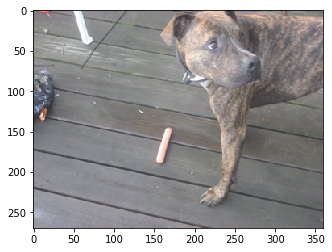

In [52]:
import matplotlib.pyplot as plt
plt.imshow(test)